####  Script Name: F1 Score Calculation
####  Purpose: To calcualte F1 score,Precision and Recall for given file input for Thursday
####  Input: test.psv
####  Output: 
####  Version: 0.1
####  Author: Pem Kumar Rajendran
####  Block1: Library used Pandas,Numpy,matplot,sklearn(for Calculating F1 score)
####  Block2: Library used Pandas,Numpy,matplot and implemented one logic for calculatinf F1 score without external library

##  Block1: Library used Pandas,Numpy,matplot,sklearn(for Calculating F1 score)

Top 5 Lines of Input: 

        dates  y  yhat
0  1999-11-01  0     0
1  1999-11-02  0     1
2  1999-11-03  1     1
3  1999-11-04  1     0
4  1999-11-05  0     1


Initial Data Exploration based on y: 





<Figure size 432x288 with 0 Axes>

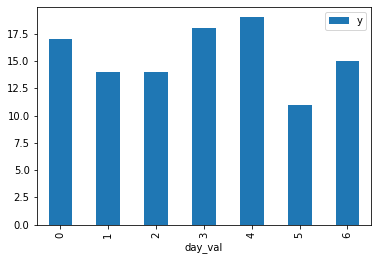

<Figure size 432x288 with 0 Axes>

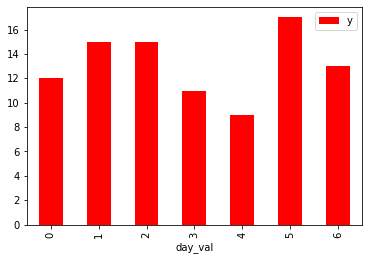



Metrics for All Days Epoch: 



       Epoch  fold_n  accuracy_score   f1_score  precision_score  recall_score
0     Monday       0       62.068966  60.372671        60.606061     60.294118
1    Tuesday       1       41.379310  41.099164        41.105769     41.190476
2  Wednesday       2       55.172414  55.172414        55.238095     55.238095
3   Thursday       3       37.931034  37.259615        38.333333     37.626263
4     Friday       4       46.428571  42.857143        43.750000     42.982456
5   Saturday       5       42.857143  42.857143        44.919786     44.919786
6     Sunday       6       50.000000  49.743590        49.743590     49.743590
Metrics: 


Metrics in Line Plot 





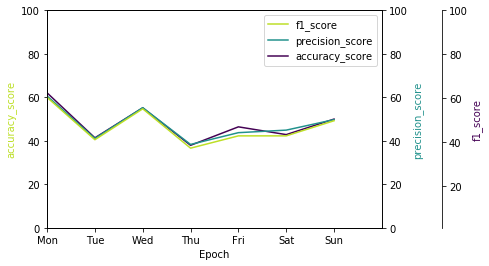

In [3]:
import datetime as dt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
import matplotlib.pyplot as plt

def day_val(rowdata):
    
## Function to return Day Names
## Input Dataframe rows
## Output: Day names
## Eg: 2020-09-05 as Thursday

    val=dt.datetime.strptime(rowdata['dates'], '%Y-%m-%d').weekday()
    #val=rowdata['dates']
    return val


# Read file #
test_date_file='test.psv'
input_dataframe=pd.read_csv(test_date_file, sep='|',  parse_dates=True,skiprows=1,header=0)

print("Top 5 Lines of Input: \n")
print(input_dataframe.head(5))
print("\n")
## Create new column for Day names by apply funtion and filter rows for Thursday
input_dataframe['day_val'] = input_dataframe.apply(day_val, axis=1)

sample_numbers = 20

print("Initial Data Exploration based on y: \n")
print("\n")

## Label 0 Initial Data Analysis
class_train_frame_1 = input_dataframe.query('y == 0')[['y','day_val']]
plt.clf()
class_train_frame_1.groupby('day_val').count().plot(kind='bar')
plt.show()
print("\n")
## Label 0 Initial Data Analysis
class_train_frame_2 = input_dataframe.query('y == 1')[['y','day_val']]
plt.clf()
class_train_frame_2.groupby('day_val').count().plot(kind='bar',color = 'r')
plt.show()
print("\n")
del class_train_frame_2,class_train_frame_1

epoch=[0,1,2,3,4,5,6]
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
Epoch=[]
fold_n=[]
week_dict={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
for i in epoch:
    day_val=i
    input_dataframe_t = input_dataframe.query('day_val == @day_val')
    y_actual=input_dataframe_t['y'].to_numpy()
    y_predict=input_dataframe_t['yhat'].to_numpy()   
    #cm=build_confusion_matrix(y_actual,y_predict)
    rf_accuracy_score = accuracy_score(y_actual, y_predict)
    rf_precision_score = precision_score(y_actual, y_predict, average='macro')
    rf_f1_score = f1_score(y_actual, y_predict, average='macro')
    rf_recall_score = recall_score(y_actual, y_predict, average='macro')
    accuracy_scores.append(rf_accuracy_score*100)
    f1_scores.append(rf_f1_score*100)
    precision_scores.append(rf_precision_score*100)
    recall_scores.append(rf_recall_score*100)
    Epoch.append(week_dict.get(i))
    fold_n.append(i)
    
report_frame = pd.concat([pd.Series(Epoch,name='Epoch'),pd.Series(fold_n,name='fold_n'),pd.Series(accuracy_scores,name='accuracy_score'),pd.Series(f1_scores,name='f1_score'),pd.Series(precision_scores,name='precision_score'),pd.Series(recall_scores,name='recall_score')], axis=1)

print("Metrics for All Days Epoch: \n")
print("\n")
print(report_frame  )




print ('Metrics: ')
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlim(0, 7)
host.set_ylim(0, 100)
par1.set_ylim(0, 100)
par2.set_ylim(1, 100)

host.set_xlabel("Epoch")
host.set_ylabel("accuracy_score")
par1.set_ylabel("precision_score")
par2.set_ylabel("f1_score")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p3, = host.plot(report_frame['Epoch'].str.slice(stop=3), report_frame['accuracy_score'], color=color1,label="accuracy_score")
p2, = par1.plot(report_frame['Epoch'].str.slice(stop=3), report_frame['precision_score'], color=color2, label="precision_score")
p1, = par2.plot(report_frame['Epoch'].str.slice(stop=3), report_frame['f1_score'], color=color3, label="f1_score")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

print("\n")
print("Metrics in Line Plot \n")
print("\n")
plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')
plt.show()


##  Block2: Library used Pandas,Numpy,matplot and implemented one logic for calculatinf F1 score without external library

###  Using One Logic to calculate F1,Recall and Precision instead of using external library


Top 5 Lines of Input: 

        dates  y  yhat
0  1999-11-01  0     0
1  1999-11-02  0     1
2  1999-11-03  1     1
3  1999-11-04  1     0
4  1999-11-05  0     1




<Figure size 432x288 with 0 Axes>

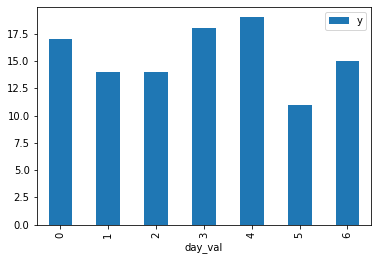

<Figure size 432x288 with 0 Axes>

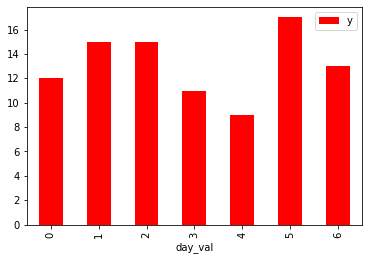



Metrics for All Days Epoch: 



       Epoch  fold_n  f1_score  precision_score  recall_score
0     Monday       0      69.0             71.0          67.0
1    Tuesday       1      37.0             36.0          38.0
2  Wednesday       2      55.0             57.0          53.0
3   Thursday       3      44.0             39.0          50.0
4     Friday       4      57.0             53.0          62.0
5   Saturday       5      43.0             55.0          35.0
6     Sunday       6      53.0             53.0          53.0
Metrics: 


Metrics in Line Plot 





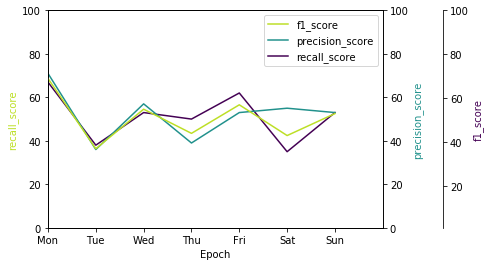

In [2]:
import datetime as dt
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt1

def day_val(rowdata):
    
## Function to return Day Names
## Input Dataframe rows
## Output: Day names
## Eg: 2020-09-05 as Thursday

    val=dt.datetime.strptime(rowdata['dates'], '%Y-%m-%d').weekday()
    #val=rowdata['dates']
    return val

def build_confusion_matrix(y_actual,y_predict):

## Function to return Day Names
## Input : y_actual,y_predict
## Output: Stats Confusion Matrix
     y_labels = np.unique(y_actual)
     n_labels = y_labels.size
     label_to_ind = {y: x for x, y in enumerate(y_labels)}
     sample_weight = np.ones(y_actual.shape[0], dtype=np.int64)
     # convert y_actual, y_pred into index
     y_pred = np.array([label_to_ind.get(x, n_labels + 1) for x in y_predict])
     y_true = np.array([label_to_ind.get(x, n_labels + 1) for x in y_actual])
     ind = np.logical_and(y_predict < n_labels, y_actual < n_labels)
     sample_weight = sample_weight[ind]
     y_pred = y_pred[ind]
     y_true = y_true[ind]  
      
     cm_mtrix = coo_matrix((sample_weight, (y_true, y_pred)),
                         shape=(n_labels, n_labels), dtype= np.int64,
                         ).toarray()
     
     return cm_mtrix

def f1_prec_recall(cm):
## Function to calculate F1,Precision,Recal
## Input : Confusion matric: shape (2,2) 
## Output: f1,precision,recall   
    tp=cm[0, 0]
    fp=cm[0, 1]
    fn=cm[1, 0]
    tn=cm[1, 1]
    precision=round(tp/(tp+fp),2)
    recall=round(tp/(tp+fn),2)
    f1=round(2*((precision*recall)/(precision+recall)),2)
    return(f1,precision,recall)
    
# Read file #
test_date_file='test.psv'
input_dataframe=pd.read_csv(test_date_file, sep='|',  parse_dates=True,skiprows=1,header=0)
print("Top 5 Lines of Input: \n")
print(input_dataframe.head(5))
print("\n")



## Create new column for Day names by apply funtion and filter rows for Thursday
input_dataframe['day_val'] = input_dataframe.apply(day_val, axis=1)

## Label 0 Initial Data Analysis
class_train_frame_1 = input_dataframe.query('y == 0')[['y','day_val']]
plt.clf()
class_train_frame_1.groupby('day_val').count().plot(kind='bar')
plt.show()
print("\n")
## Label 0 Initial Data Analysis
class_train_frame_2 = input_dataframe.query('y == 1')[['y','day_val']]
plt.clf()
class_train_frame_2.groupby('day_val').count().plot(kind='bar',color = 'r')
plt.show()
print("\n")
del class_train_frame_2,class_train_frame_1

epoch=[0,1,2,3,4,5,6]
#epoch=[3]
week_dict={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
Epoch=[]
fold_n=[]

for i in epoch:
    day_val=i
    input_dataframe_t = input_dataframe.query('day_val == @day_val')
    y_actual=input_dataframe_t['y'].to_numpy()
    y_predict=input_dataframe_t['yhat'].to_numpy()   
    cm=build_confusion_matrix(y_actual,y_predict)
    #print(input_dataframe_t)
    #print(cm)
    f1,precision,recall=f1_prec_recall(cm)
 
    f1_scores.append(f1*100)
    precision_scores.append(precision*100)
    recall_scores.append(recall*100)
    Epoch.append(week_dict.get(i))
    fold_n.append(i)

report_frame = pd.concat([pd.Series(Epoch,name='Epoch'),pd.Series(fold_n,name='fold_n'),pd.Series(f1_scores,name='f1_score'),pd.Series(precision_scores,name='precision_score'),pd.Series(recall_scores,name='recall_score')], axis=1)

print("Metrics for All Days Epoch: \n")
print("\n")
print(report_frame  )




print ('Metrics: ')
fig = plt1.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlim(0, 7)
host.set_ylim(0, 100)
par1.set_ylim(0, 100)
par2.set_ylim(1, 100)

host.set_xlabel("Epoch")
host.set_ylabel("recall_score")
par1.set_ylabel("precision_score")
par2.set_ylabel("f1_score")

color1 = plt1.cm.viridis(0)
color2 = plt1.cm.viridis(0.5)
color3 = plt1.cm.viridis(.9)

p3, = host.plot(report_frame['Epoch'].str.slice(stop=3), report_frame['recall_score'], color=color1,label="recall_score")
p2, = par1.plot(report_frame['Epoch'].str.slice(stop=3), report_frame['precision_score'], color=color2, label="precision_score")
p1, = par2.plot(report_frame['Epoch'].str.slice(stop=3), report_frame['f1_score'], color=color3, label="f1_score")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

print("\n")
print("Metrics in Line Plot \n")
print("\n")
plt1.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')
plt1.show()
